# Sentiment based on tweet frequency

There are 407,489 tweets that need to be split up

In [3]:
import os # creating directories
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
# load cleaned tweet corpus data
df = pd.read_csv("../datain/topic_modelling/cleaned_tweets_largest_community.csv")
df = df.drop("Unnamed: 0", axis=1)
df

,created_at,id,cleaned_tweet
0,2021-05-31 23:59:42+00:00,1399515966774530048,good project
1,2021-05-31 23:59:40+00:00,1399515957362450432,great project reset
2,2021-05-31 23:59:35+00:00,1399515936093204480,beautiful project congratulations whole team h...
3,2021-05-31 23:58:47+00:00,1399515734007447552,participating cryptoultraman airdrop round
4,2021-05-31 23:58:44+00:00,1399515723274280960,nice find project project great invite many pe...
...,...,...,...
407484,2021-02-01 11:31:45+00:00,1356203583193063424,dena great
407485,2021-02-01 11:05:55+00:00,1356197080272752640,join gays dena
407486,2021-02-01 10:49:53+00:00,1356193045817872384,great project
407487,2021-02-01 09:29:19+00:00,1356172769424244736,rates determined higher chance worse low chanc...


# Clean data

In [41]:
# remove all null created_at values from dataframe
df = df.drop(df[df['created_at'].isnull()].index)
df = df.drop(df[df['cleaned_tweet'].isnull()].index)
# ensure that all values in created_at has 2021 (and not random strings)
df = df[df['created_at'].str.contains("2021")]

In [42]:
df[df["cleaned_tweet"].isnull()]

,created_at,id,cleaned_tweet


# Sentiment: apply polarity score

In [43]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [44]:
analyzer = SentimentIntensityAnalyzer()

In [45]:
# add polarity scores to df
# https://github.com/sidneykung/twitter_hate_speech_detection/blob/master/preprocessing/VADER_sentiment.ipynb
pol = lambda x: analyzer.polarity_scores(x)
df['polarity'] = df["cleaned_tweet"].apply(pol)
df

,created_at,id,cleaned_tweet,polarity
0,2021-05-31 23:59:42+00:00,1399515966774530048,good project,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp..."
1,2021-05-31 23:59:40+00:00,1399515957362450432,great project reset,"{'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'comp..."
2,2021-05-31 23:59:35+00:00,1399515936093204480,beautiful project congratulations whole team h...,"{'neg': 0.0, 'neu': 0.251, 'pos': 0.749, 'comp..."
3,2021-05-31 23:58:47+00:00,1399515734007447552,participating cryptoultraman airdrop round,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,2021-05-31 23:58:44+00:00,1399515723274280960,nice find project project great invite many pe...,"{'neg': 0.0, 'neu': 0.467, 'pos': 0.533, 'comp..."
...,...,...,...,...
407484,2021-02-01 11:31:45+00:00,1356203583193063424,dena great,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp..."
407485,2021-02-01 11:05:55+00:00,1356197080272752640,join gays dena,"{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'comp..."
407486,2021-02-01 10:49:53+00:00,1356193045817872384,great project,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp..."
407487,2021-02-01 09:29:19+00:00,1356172769424244736,rates determined higher chance worse low chanc...,"{'neg': 0.252, 'neu': 0.34, 'pos': 0.408, 'com..."


In [47]:
# split polarity scores into separate columns
df = pd.concat([df.drop(['polarity'], axis=1), df['polarity'].apply(pd.Series)], axis=1)
df

,created_at,id,cleaned_tweet,neg,neu,pos,compound
0,2021-05-31 23:59:42+00:00,1399515966774530048,good project,0.000,0.256,0.744,0.4404
1,2021-05-31 23:59:40+00:00,1399515957362450432,great project reset,0.000,0.328,0.672,0.6249
2,2021-05-31 23:59:35+00:00,1399515936093204480,beautiful project congratulations whole team h...,0.000,0.251,0.749,0.9677
3,2021-05-31 23:58:47+00:00,1399515734007447552,participating cryptoultraman airdrop round,0.000,1.000,0.000,0.0000
4,2021-05-31 23:58:44+00:00,1399515723274280960,nice find project project great invite many pe...,0.000,0.467,0.533,0.8860
...,...,...,...,...,...,...,...
407484,2021-02-01 11:31:45+00:00,1356203583193063424,dena great,0.000,0.196,0.804,0.6249
407485,2021-02-01 11:05:55+00:00,1356197080272752640,join gays dena,0.000,0.476,0.524,0.2960
407486,2021-02-01 10:49:53+00:00,1356193045817872384,great project,0.000,0.196,0.804,0.6249
407487,2021-02-01 09:29:19+00:00,1356172769424244736,rates determined higher chance worse low chanc...,0.252,0.340,0.408,0.2960


## Sentiment: round polarity

In [49]:
def calc_polarity(x, bound):
    if x < -0.05:
        return -1
    elif x > 0.05:
        return 1
    else:
        return 0

round_pol = lambda x: calc_polarity(x, 0.05)

In [50]:
# round polarity up/down
df['rounded_polarity'] = df['compound'].apply(round_pol)
df

,created_at,id,cleaned_tweet,neg,neu,pos,compound,rounded_polarity
0,2021-05-31 23:59:42+00:00,1399515966774530048,good project,0.000,0.256,0.744,0.4404,1
1,2021-05-31 23:59:40+00:00,1399515957362450432,great project reset,0.000,0.328,0.672,0.6249,1
2,2021-05-31 23:59:35+00:00,1399515936093204480,beautiful project congratulations whole team h...,0.000,0.251,0.749,0.9677,1
3,2021-05-31 23:58:47+00:00,1399515734007447552,participating cryptoultraman airdrop round,0.000,1.000,0.000,0.0000,0
4,2021-05-31 23:58:44+00:00,1399515723274280960,nice find project project great invite many pe...,0.000,0.467,0.533,0.8860,1
...,...,...,...,...,...,...,...,...
407484,2021-02-01 11:31:45+00:00,1356203583193063424,dena great,0.000,0.196,0.804,0.6249,1
407485,2021-02-01 11:05:55+00:00,1356197080272752640,join gays dena,0.000,0.476,0.524,0.2960,1
407486,2021-02-01 10:49:53+00:00,1356193045817872384,great project,0.000,0.196,0.804,0.6249,1
407487,2021-02-01 09:29:19+00:00,1356172769424244736,rates determined higher chance worse low chanc...,0.252,0.340,0.408,0.2960,1


Text(0.5, 0, 'Tweets')

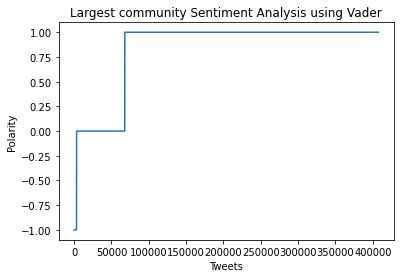

In [52]:
# plot rounded polarity
plt.plot(df.index, df['rounded_polarity'].sort_values())
plt.title('Largest community Sentiment Analysis using Vader')
plt.ylabel('Polarity')
plt.xlabel('Tweets')

In [53]:
# get amount of rounded negative, neutral, and positive polarity
num_rounded_sentiments = df.groupby('rounded_polarity').count()
num_rounded_sentiments

,created_at,id,cleaned_tweet,neg,neu,pos,compound
rounded_polarity,,,,,,,
-1,3289,3289,3289,3289,3289,3289,3289
0,64428,64428,64428,64428,64428,64428,64428
1,338314,338314,338314,338314,338314,338314,338314


Text(0, 0.5, 'Count')

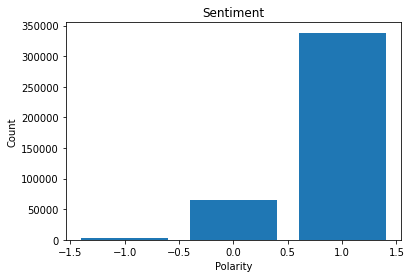

In [54]:
# plot rounded negative, neutral, and positive sentiment amounts
plt.bar(num_rounded_sentiments.index, num_rounded_sentiments["compound"])
plt.title('Sentiment')
plt.xlabel('Polarity')
plt.ylabel('Count')

# Split data into segments

In [58]:
# split df into n groups of equal length (returns list of sub dataframes)
# https://stackoverflow.com/questions/2130016/splitting-a-list-into-n-parts-of-approximately-equal-length
def split(a, n):
    k, m = divmod(len(a), n)
    return (a[i*k+min(i, m):(i+1)*k+min(i+1, m)] for i in range(n))

In [59]:
# list of dfs
sub_dfs = list(split(df, 58))
sub_dfs

[                     created_at                   id  \
 0     2021-05-31 23:59:42+00:00  1399515966774530048   
 1     2021-05-31 23:59:40+00:00  1399515957362450432   
 2     2021-05-31 23:59:35+00:00  1399515936093204480   
 3     2021-05-31 23:58:47+00:00  1399515734007447552   
 4     2021-05-31 23:58:44+00:00  1399515723274280960   
 ...                         ...                  ...   
 7009  2021-05-31 09:41:18+00:00  1399299939797245952   
 7010  2021-05-31 09:40:48+00:00  1399299814060265472   
 7011  2021-05-31 09:40:46+00:00  1399299806766387200   
 7012  2021-05-31 09:40:38+00:00  1399299773165752320   
 7013  2021-05-31 09:40:36+00:00  1399299766496858112   
 
                                           cleaned_tweet  neg    neu    pos  \
 0                                          good project  0.0  0.256  0.744   
 1                                   great project reset  0.0  0.328  0.672   
 2     beautiful project congratulations whole team h...  0.0  0.251  0.749  

In [60]:
sub_dfs[0]

,created_at,id,cleaned_tweet,neg,neu,pos,compound,rounded_polarity
0,2021-05-31 23:59:42+00:00,1399515966774530048,good project,0.0,0.256,0.744,0.4404,1
1,2021-05-31 23:59:40+00:00,1399515957362450432,great project reset,0.0,0.328,0.672,0.6249,1
2,2021-05-31 23:59:35+00:00,1399515936093204480,beautiful project congratulations whole team h...,0.0,0.251,0.749,0.9677,1
3,2021-05-31 23:58:47+00:00,1399515734007447552,participating cryptoultraman airdrop round,0.0,1.000,0.000,0.0000,0
4,2021-05-31 23:58:44+00:00,1399515723274280960,nice find project project great invite many pe...,0.0,0.467,0.533,0.8860,1
...,...,...,...,...,...,...,...,...
7009,2021-05-31 09:41:18+00:00,1399299939797245952,ape come stay go ape,0.0,1.000,0.000,0.0000,0
7010,2021-05-31 09:40:48+00:00,1399299814060265472,nice airdrop join airdrop,0.0,0.286,0.714,0.6124,1
7011,2021-05-31 09:40:46+00:00,1399299806766387200,nice project,0.0,0.263,0.737,0.4215,1
7012,2021-05-31 09:40:38+00:00,1399299773165752320,good project,0.0,0.256,0.744,0.4404,1


# Sentiment analysis per segment

In [61]:
def get_avg_segment_sentiment(df):
    sumsentiment = 0
    count = 0
    for i in range(len(df.index)):
        sumsentiment += df['compound'].iloc[i]
        count += 1
    return sumsentiment / count

In [62]:
# compounds = []
# firstcol = []
# for sub_df in sub_dfs:
    
#     print(sub_df.compound.mean())
#     get_avg_segment_sentiment(sub_df)

0.5856122268247392
0.348369832881017
0.435729752892444
0.4254343093843737
0.3878610055706328
0.4187901585487788
0.6045360377088987
0.51770311384088
0.5779119554349379
0.25603102413940865
0.44165812026853307
0.6381993429510071
0.490506813312384
0.42088930152835313
0.2705808170261391
0.3367786316240537
0.6214290815597772
0.5902863448078847
0.5008616911869733
0.5321925724896444
0.5349694900728468
0.4921279102985288
0.3875263390944151
0.5217734895014998
0.5549046279102986
0.5722031995429225
0.5267736323382375
0.5536319382945294
0.5557658620197115
0.581182016854735
0.4104150121411227
0.4427249857142858
0.4413742857142857
0.4575632142857143
0.5088161142857143
0.6739507571428572
0.5646637142857143
0.6779436142857143
0.6572296142857142
0.6549228714285714
0.6567163857142857
0.6644173428571429
0.7450652571428571
0.6716053714285715
0.599247557142857
0.6047349142857141
0.5282923285714285
0.5535770428571428
0.5836821428571429
0.5772136428571429
0.5880455285714286
0.6308058428571429
0.6223103
0.6783

In [69]:
compounds = []
mns, mxs = [], []
for sub_df in sub_dfs:
    compounds.append(sub_df.compound.mean())
    mxs.append(sub_df.index.max())
    mns.append(sub_df.index.min())

compound_df = pd.DataFrame(dict(
    mn=mns,
    mx=mxs,
    compouned=compounds
))

In [70]:
compound_df

,mn,mx,compouned
0,0,7013,0.585612
1,7014,14021,0.348370
2,14022,21034,0.435730
3,21035,28058,0.425434
4,28059,35073,0.387861
5,35074,42082,0.418790
6,42083,49094,0.604536
7,49095,56106,0.517703
8,56107,63120,0.577912
9,63121,70137,0.256031


Text(0, 0.5, 'Average Polarity')

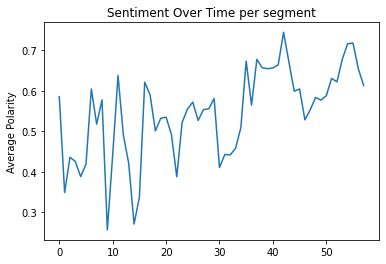

In [72]:
#plot average sentiment over time
plt.plot(compound_df.index, compound_df['compouned'])
plt.title('Sentiment Over Time per segment')
plt.ylabel('Average Polarity')
# plt.xlabel('Day of May 2021')